''' In this project I am doing case study on insurance dataset using linear regression.
I have calculated VIF (Variance inflation factor) value,rmse, mean absolute percentage(map) error, box plot analysis, outlier removal, multicolinearity analysis, null data 
tranformation using mean, median and mode values.'''

In [128]:
for i in range(0,3): print('om shiv gorakh')

om shiv gorakh
om shiv gorakh
om shiv gorakh


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
insurance = pd.read_csv('new_insurance_data.csv')

In [131]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [132]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [133]:
# Null values

In [134]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [135]:
insurance.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [136]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [137]:
col = list(insurance.columns)

In [138]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [139]:
insurance['age'].mean()

39.31000752445448

In [140]:
# handling missing data by substituing values (mean, median,mode)

In [141]:
for col_name in col:
    if insurance[col_name].dtypes == 'object':
        insurance[col_name] = insurance[col_name].fillna(insurance[col_name].mode()[0])
    else:
        insurance[col_name] = insurance[col_name].fillna(insurance[col_name].mean())

In [142]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [143]:
insurance.shape

(1338, 13)

In [144]:
# visualisation using matplotlib

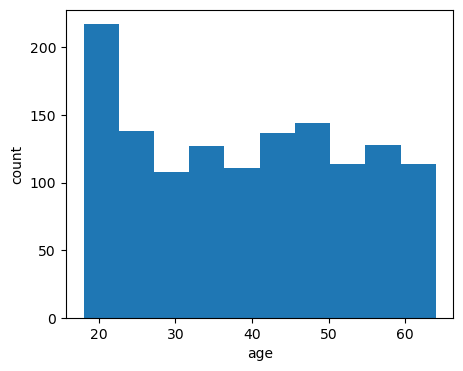

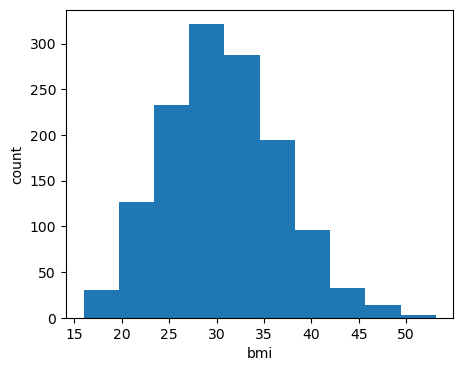

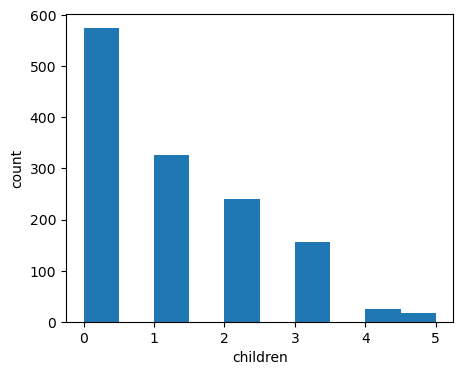

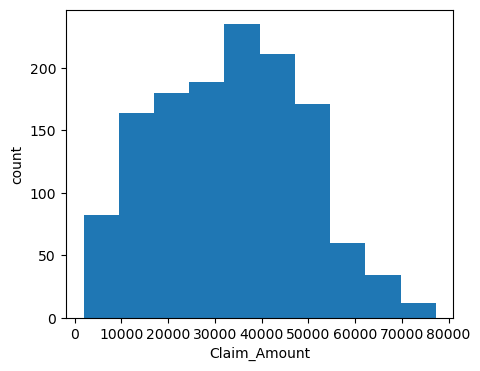

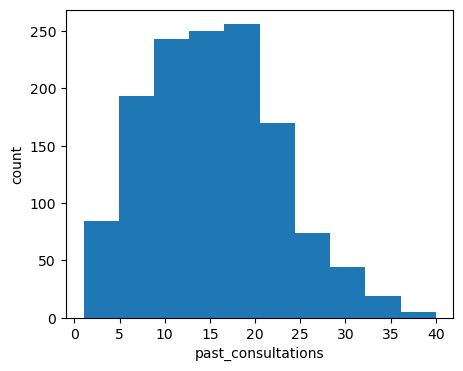

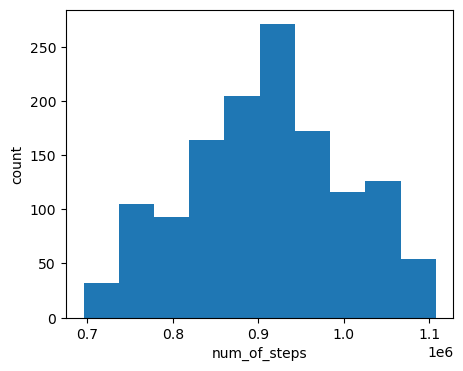

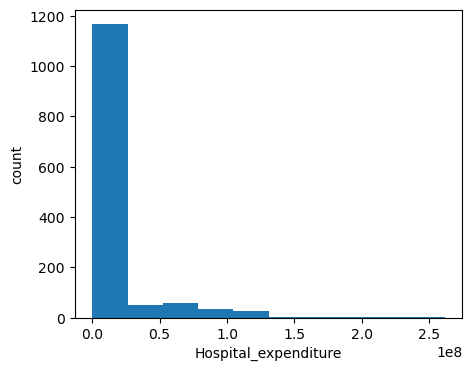

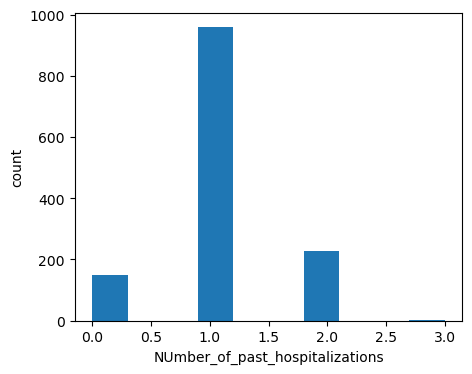

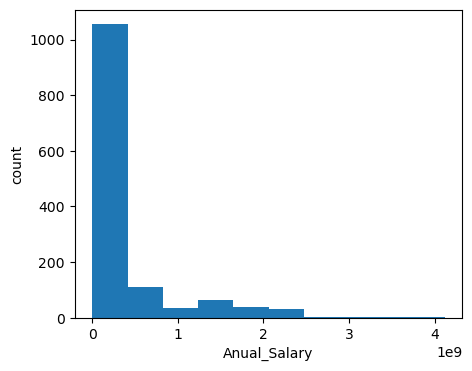

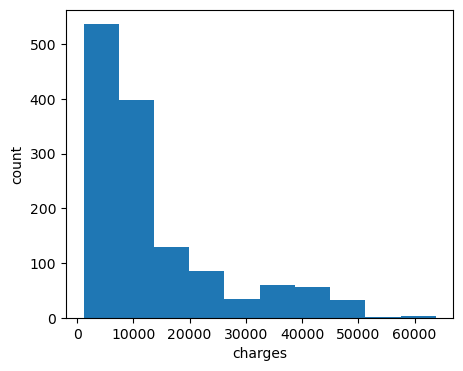

In [145]:
for col_name in col:
    if(insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
        plt.figure(figsize=(5,4))
        plt.hist(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

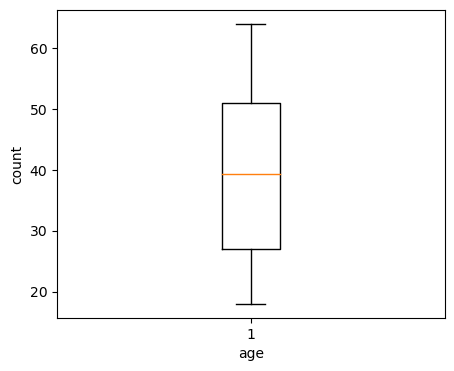

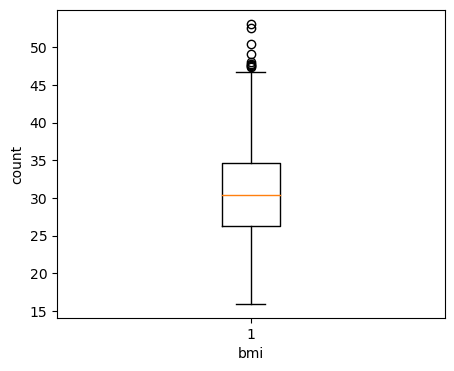

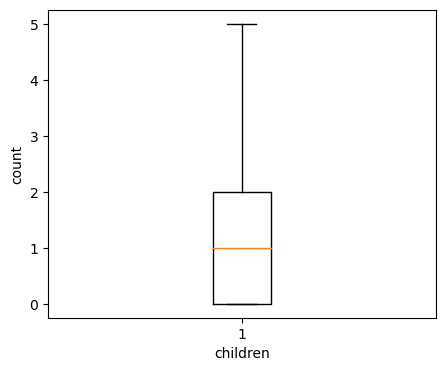

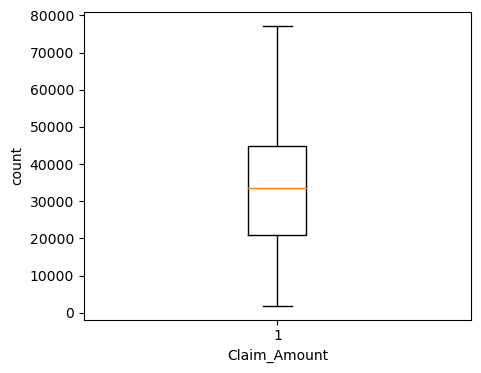

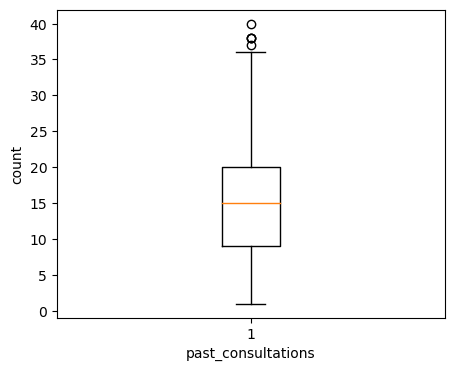

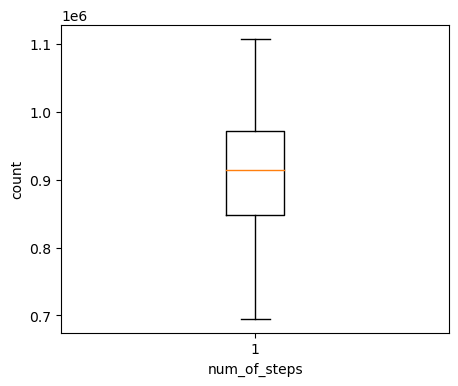

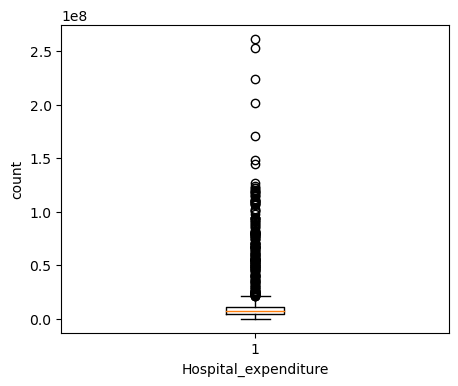

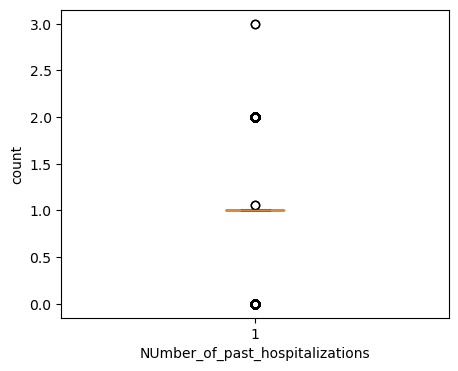

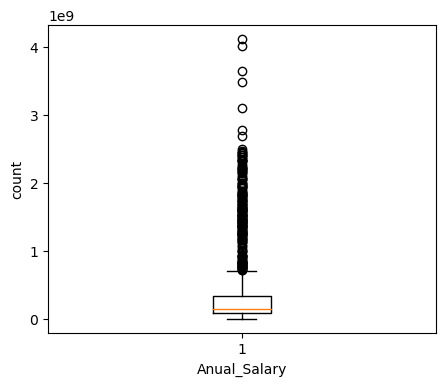

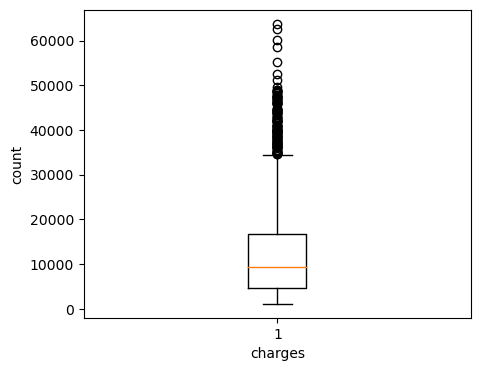

In [146]:
for col_name in col:
    if (insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
        plt.figure(figsize=(5,4))
        plt.boxplot(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [147]:
#treating outliers

In [148]:
Q1 = insurance.bmi.quantile(0.25)
Q3 = insurance.bmi.quantile(0.75)

In [149]:
Q1

26.315

In [150]:
Q3

34.65625

In [151]:
IQR = Q3-Q1
IQR

8.341249999999999

In [152]:
Q1 = insurance.bmi.quantile(0.25)
Q3 = insurance.bmi.quantile(0.75)
IQR = Q3-Q1
insurance = insurance[(insurance.bmi >= Q1 - 1.5*IQR) & (insurance.bmi <= Q3 + 1.5*IQR)]

Q1 = insurance.past_consultations.quantile(0.25)
Q3 = insurance.past_consultations.quantile(0.75)
IQR = Q3-Q1
insurance = insurance[(insurance.past_consultations >= Q1-1.5*IQR) & (insurance.past_consultations <= Q3+1.5*IQR)]

Q1 = insurance.Hospital_expenditure.quantile(0.25)
Q3 = insurance.Hospital_expenditure.quantile(0.75)
IQR = Q3-Q1
insurance = insurance[(insurance.Hospital_expenditure >= Q1-1.5*IQR) & (insurance.Hospital_expenditure <= Q3+1.5*IQR)]

Q1 = insurance.Anual_Salary.quantile(0.25)
Q3 = insurance.Anual_Salary.quantile(0.75)
IQR = Q3-Q1
insurance = insurance[(insurance.Anual_Salary >= Q1-1.5*IQR) & (insurance.Anual_Salary <= Q3+1.5*IQR)]

In [153]:
insurance.shape

(1030, 13)

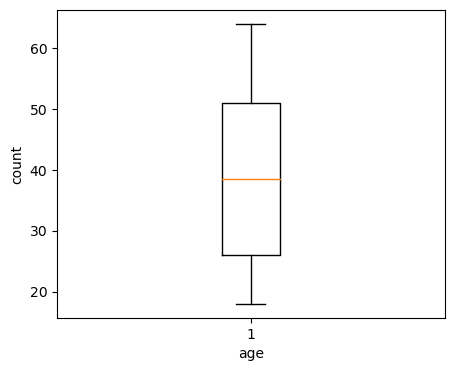

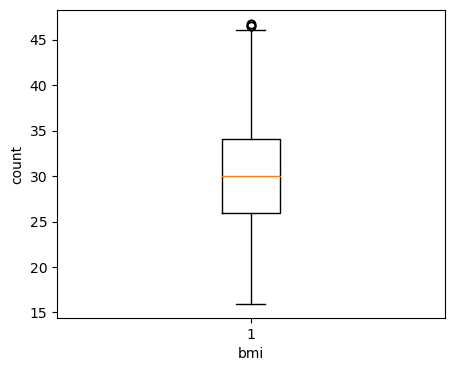

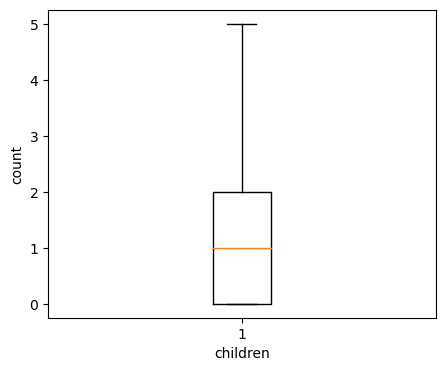

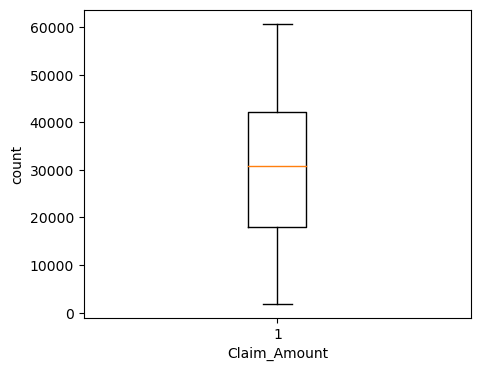

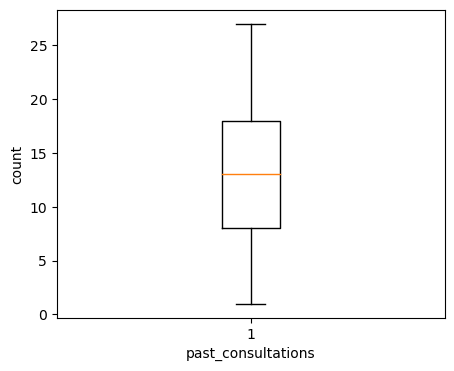

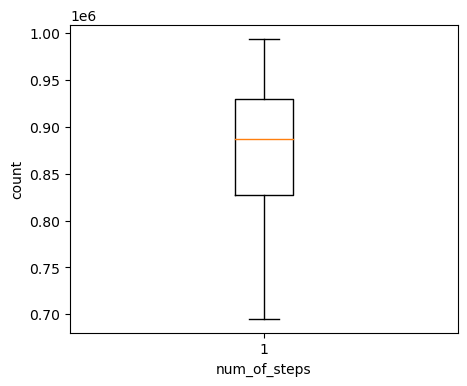

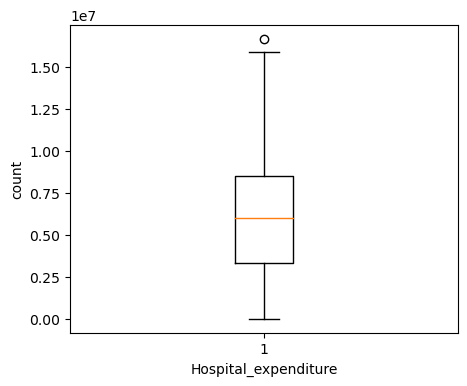

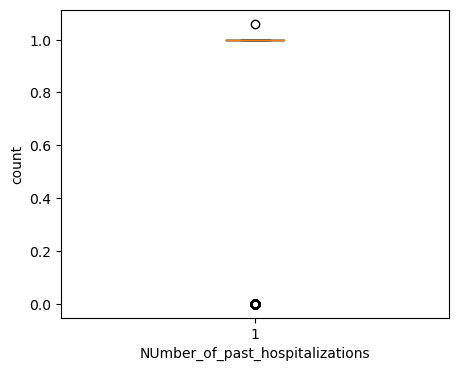

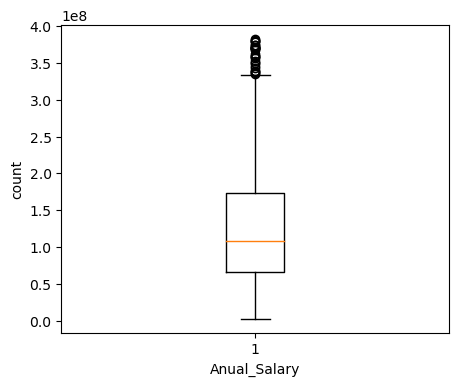

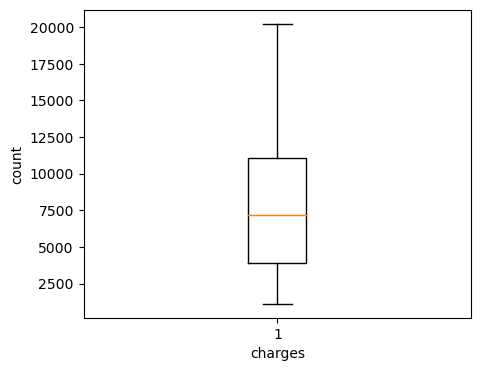

In [154]:
for col_name in col:
    if(insurance[col_name].dtypes == 'int64' or insurance[col_name].dtypes == 'float64'):
        plt.figure(figsize=(5,4))
        plt.boxplot(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [155]:
# correlation analysis

In [156]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1030 non-null   float64
 1   sex                              1030 non-null   object 
 2   bmi                              1030 non-null   float64
 3   children                         1030 non-null   float64
 4   smoker                           1030 non-null   object 
 5   Claim_Amount                     1030 non-null   float64
 6   past_consultations               1030 non-null   float64
 7   num_of_steps                     1030 non-null   float64
 8   Hospital_expenditure             1030 non-null   float64
 9   NUmber_of_past_hospitalizations  1030 non-null   float64
 10  Anual_Salary                     1030 non-null   float64
 11  region                           1030 non-null   object 
 12  charges                  

In [157]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [158]:
# dropping non numerical columns for correlation analysis

In [159]:
insurance.drop(columns=['sex','smoker','region'], inplace=True)

In [160]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1030 non-null   float64
 1   bmi                              1030 non-null   float64
 2   children                         1030 non-null   float64
 3   Claim_Amount                     1030 non-null   float64
 4   past_consultations               1030 non-null   float64
 5   num_of_steps                     1030 non-null   float64
 6   Hospital_expenditure             1030 non-null   float64
 7   NUmber_of_past_hospitalizations  1030 non-null   float64
 8   Anual_Salary                     1030 non-null   float64
 9   charges                          1030 non-null   float64
dtypes: float64(10)
memory usage: 88.5 KB


In [161]:
insurance.corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.045371,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.006477,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.045371,0.006477,1.000000,0.041716,0.045472,0.228830,-0.007494,0.316622,0.064840,0.138470
Claim_Amount,0.117750,0.008343,0.041716,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.045472,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.228830,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.007494,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.316622,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.064840,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.138470,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


In [162]:
cor1 = insurance.corr().iloc[-1,:] # Corelattion of all the columns with charges column

In [163]:
cor1

age                                0.676071
bmi                                0.010248
children                           0.138470
Claim_Amount                       0.192601
past_consultations                 0.278131
num_of_steps                       0.936946
Hospital_expenditure               0.358378
NUmber_of_past_hospitalizations    0.538116
Anual_Salary                       0.892308
charges                            1.000000
Name: charges, dtype: float64

In [164]:
cor2 = insurance.iloc[:,:-1].corr()  #corelation between the independent columns

In [165]:
cor2

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
age,1.000000,0.155957,0.045371,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802
bmi,0.155957,1.000000,0.006477,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105
children,0.045371,0.006477,1.000000,0.041716,0.045472,0.228830,-0.007494,0.316622,0.064840
Claim_Amount,0.117750,0.008343,0.041716,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826
past_consultations,0.172063,0.023543,0.045472,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710
num_of_steps,0.749468,0.040324,0.228830,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247
Hospital_expenditure,0.160555,0.013992,-0.007494,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809
NUmber_of_past_hospitalizations,0.519538,0.016121,0.316622,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422
Anual_Salary,0.490802,0.004105,0.064840,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000


In [166]:
%matplotlib inline
import seaborn as sns

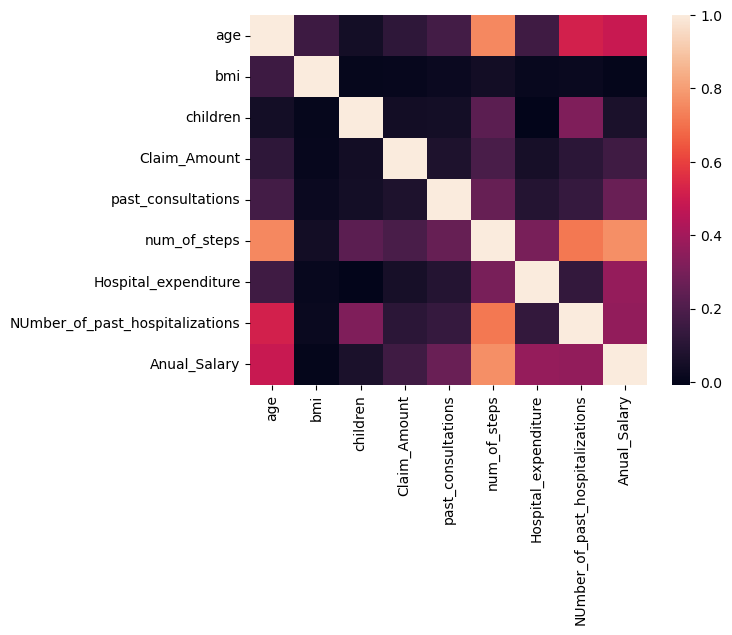

In [167]:
sns.heatmap(cor2)
plt.show()

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [169]:
x = insurance.loc[:,['age','bmi','children','Claim_Amount','past_consultations','num_of_steps','Hospital_expenditure',
                  'NUmber_of_past_hospitalizations','Anual_Salary']]
y = insurance.iloc[:,-1]

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 1)

In [171]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 9)
(206, 9)
(824,)
(206,)


In [172]:
l_model = LinearRegression()

In [173]:
l_model.fit(x_train,y_train)

LinearRegression()

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!= 'object') & (col!='charges')):
        col_list.append(col)

In [175]:
X = insurance[col_list]
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [176]:
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              age  15.452095
1                              bmi  26.330788
2                         children   2.029618
3                     Claim_Amount   5.678660
4               past_consultations   6.258017
5                     num_of_steps  61.574692
6             Hospital_expenditure   5.204376
7  NUmber_of_past_hospitalizations  12.052060
8                     Anual_Salary   5.481823


In [177]:
# Dropping the column with VIF value greate than 5

In [178]:
len(X.columns)

9

In [179]:
insurance = insurance.drop(['num_of_steps'], axis = 1)

In [182]:
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)

In [183]:
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [184]:
insurance = insurance.drop(['age'], axis = 1)

In [185]:
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)

In [186]:
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              bmi  10.323093
1                         children   1.978843
2                     Claim_Amount   5.228284
3               past_consultations   5.821933
4             Hospital_expenditure   4.929287
5  NUmber_of_past_hospitalizations   8.310570
6                     Anual_Salary   4.723495


In [187]:
insurance = insurance.drop(['bmi'], axis = 1)

In [188]:
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)

In [189]:
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                           feature       VIF
0                         children  1.977037
1                     Claim_Amount  4.547332
2               past_consultations  5.049165
3             Hospital_expenditure  4.492630
4  NUmber_of_past_hospitalizations  7.245972
5                     Anual_Salary  4.688833


In [190]:
insurance=insurance.drop(['NUmber_of_past_hospitalizations'], axis=1)

In [191]:
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)

In [192]:
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                feature       VIF
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


In [193]:
insurance.head()

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,charges
0,0.0,29087.54313,17.0,4720920.992,55784970.05,1121.8739
1,0.0,39053.67437,7.0,4329831.676,13700885.19,1131.5066
2,0.0,39023.62759,19.0,6884860.774,73523107.27,1135.9407
3,0.0,28185.39332,11.0,4274773.550,75819679.60,1136.3994
4,0.0,14697.85941,16.0,3787293.921,23012320.01,1137.0110


In [194]:
x = insurance.iloc[:,:-1]
y = insurance.iloc[:,-1]

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 1)

In [199]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(824, 5)
(824,)
(206, 5)
(206,)


In [200]:
l_model = LinearRegression()

In [201]:
l_model.fit(x_train,y_train)

LinearRegression()

In [203]:
predictions = l_model.predict(x_test)

In [207]:
error_pred = pd.DataFrame(columns=['Actual_data','Prediction_data'])

In [208]:
error_pred

,Actual_data,Prediction_data


In [209]:
error_pred['Actual_data'] = y_test

In [211]:
error_pred['Prediction_data'] = predictions

In [213]:
error_pred.head()

,Actual_data,Prediction_data
341,4779.60230,3227.949263
246,3732.62510,5781.468875
888,12730.99960,9619.941154
569,7986.47525,8686.718906
929,13470.86000,10899.302548


In [214]:
error_pred.shape

(206, 2)

In [215]:
error_pred['Error'] = error_pred['Actual_data']-error_pred['Prediction_data']

In [217]:
error_pred.head()

,Actual_data,Prediction_data,Error
341,4779.60230,3227.949263,1551.653037
246,3732.62510,5781.468875,-2048.843775
888,12730.99960,9619.941154,3111.058446
569,7986.47525,8686.718906,-700.243656
929,13470.86000,10899.302548,2571.557452


In [218]:
from sklearn.metrics import*

In [219]:
train_predict = l_model.predict(x_train)

In [225]:
# R2 score analysis on train and test set

In [221]:
r2_on_train = r2_score(y_train, train_predict)
r2_on_train

0.8177805534857867

In [223]:
r2_on_test = r2_score(y_test, predictions)
r2_on_test

0.769441716473521

In [224]:
insurance.describe()

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,charges
count,1030.000000,1030.000000,1030.000000,1.030000e+03,1.030000e+03,1030.000000
mean,1.066460,30267.786546,12.988428,5.990933e+06,1.268518e+08,7653.996666
std,1.213582,14319.311327,5.957366,3.220088e+06,8.195598e+07,4399.239848
min,0.000000,1920.136268,1.000000,2.945253e+04,2.747072e+06,1121.873900
25%,0.000000,18001.007272,8.000000,3.316228e+06,6.634997e+07,3928.113625
50%,1.000000,30819.743115,13.000000,6.012943e+06,1.081183e+08,7167.686075
75%,2.000000,42058.656820,18.000000,8.496163e+06,1.738031e+08,11080.226900
max,5.000000,60712.925340,27.000000,1.665982e+07,3.829703e+08,20234.854750


In [226]:
# RMSE analysis on train and test set

In [227]:
rmse_on_train = mean_squared_error(y_train, train_predict, squared = False)
rmse_on_train

1862.9433466358262

In [228]:
rmse_on_test = mean_squared_error(y_test, predictions, squared = False)
rmse_on_test

2171.8451212900763

In [229]:
# Mean absolute percentage error (MAP)

In [230]:
from sklearn.metrics import mean_absolute_percentage_error

In [231]:
mape_on_train = mean_absolute_percentage_error(y_train, train_predict)
mape_on_train

0.3381707192415047

In [232]:
mape_on_test = mean_absolute_percentage_error(y_test, predictions)
mape_on_test

0.4574170961797096

In [237]:
#End of project